In [1]:
# 배열
import numpy as np

# 데이터 분석
import pandas as pd

In [2]:
# Pandas option 정의
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

In [3]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Jupyter note상에 그래프 결과 포함 매직 명령
%matplotlib inline

# Matplotlib 기본 글꼴 정의
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [42]:
# matplotlib 한글 출력을 위한 설정
import sys

!echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

# 나눔 폰트를 설치합니다.
!sudo apt-get -qq -y install fonts-nanum
import matplotlib.font_manager as fm
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
for fpath in font_files:
    fm.fontManager.addfont(fpath)

# 나눔바른고딕 폰트로 설정합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 표시 오류 수정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
# 경고 문제 출력 제한
import warnings

warnings.filterwarnings( 'ignore' )

In [7]:
# Tensorflow
import tensorflow as tf

In [8]:
# Tensorflow Sequential model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model

In [9]:
# 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split

In [10]:
def disp_training( history ):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( accuracy ) + 1 )

    plt.title( '훈련 및 검증 정확도' )
    plt.plot( epochs, history.history[ 'accuracy' ], label = 'accuracy' )
    plt.plot( epochs, history.history[ 'val_accuracy' ], label = 'val_accuracy' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.figure()
    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

In [11]:
def disp_loss( history ):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( loss ) + 1 )

    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

# California 주택 가격 회귀 모델

* California housing price dataset 활용하여 주택 가격 예측 모델 생성

## 0. 데이터 준비

In [12]:
from sklearn.datasets import fetch_california_housing

In [13]:
housing = fetch_california_housing() # Data Load

In [14]:
housing.keys(), housing[ 'feature_names' ]

(dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR']),
 ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'])

## 1. 데이터 이해

In [15]:
print( housing[ 'data' ].shape ) # 입력 특성 구조

(20640, 8)


In [16]:
print( housing[ 'target' ].shape ) # label 구조

(20640,)


In [17]:
housing[ 'data' ][ 0 ] # 첫번째 입력 특성 데이터 내용

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [18]:
housing[ 'target' ][ 0 ] # 첫번째 label

4.526

In [20]:
df = pd.DataFrame( housing[ 'data' ], columns = housing[ 'feature_names' ] )
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [21]:
df[ 'Price' ] = housing[ 'target' ]
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [23]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


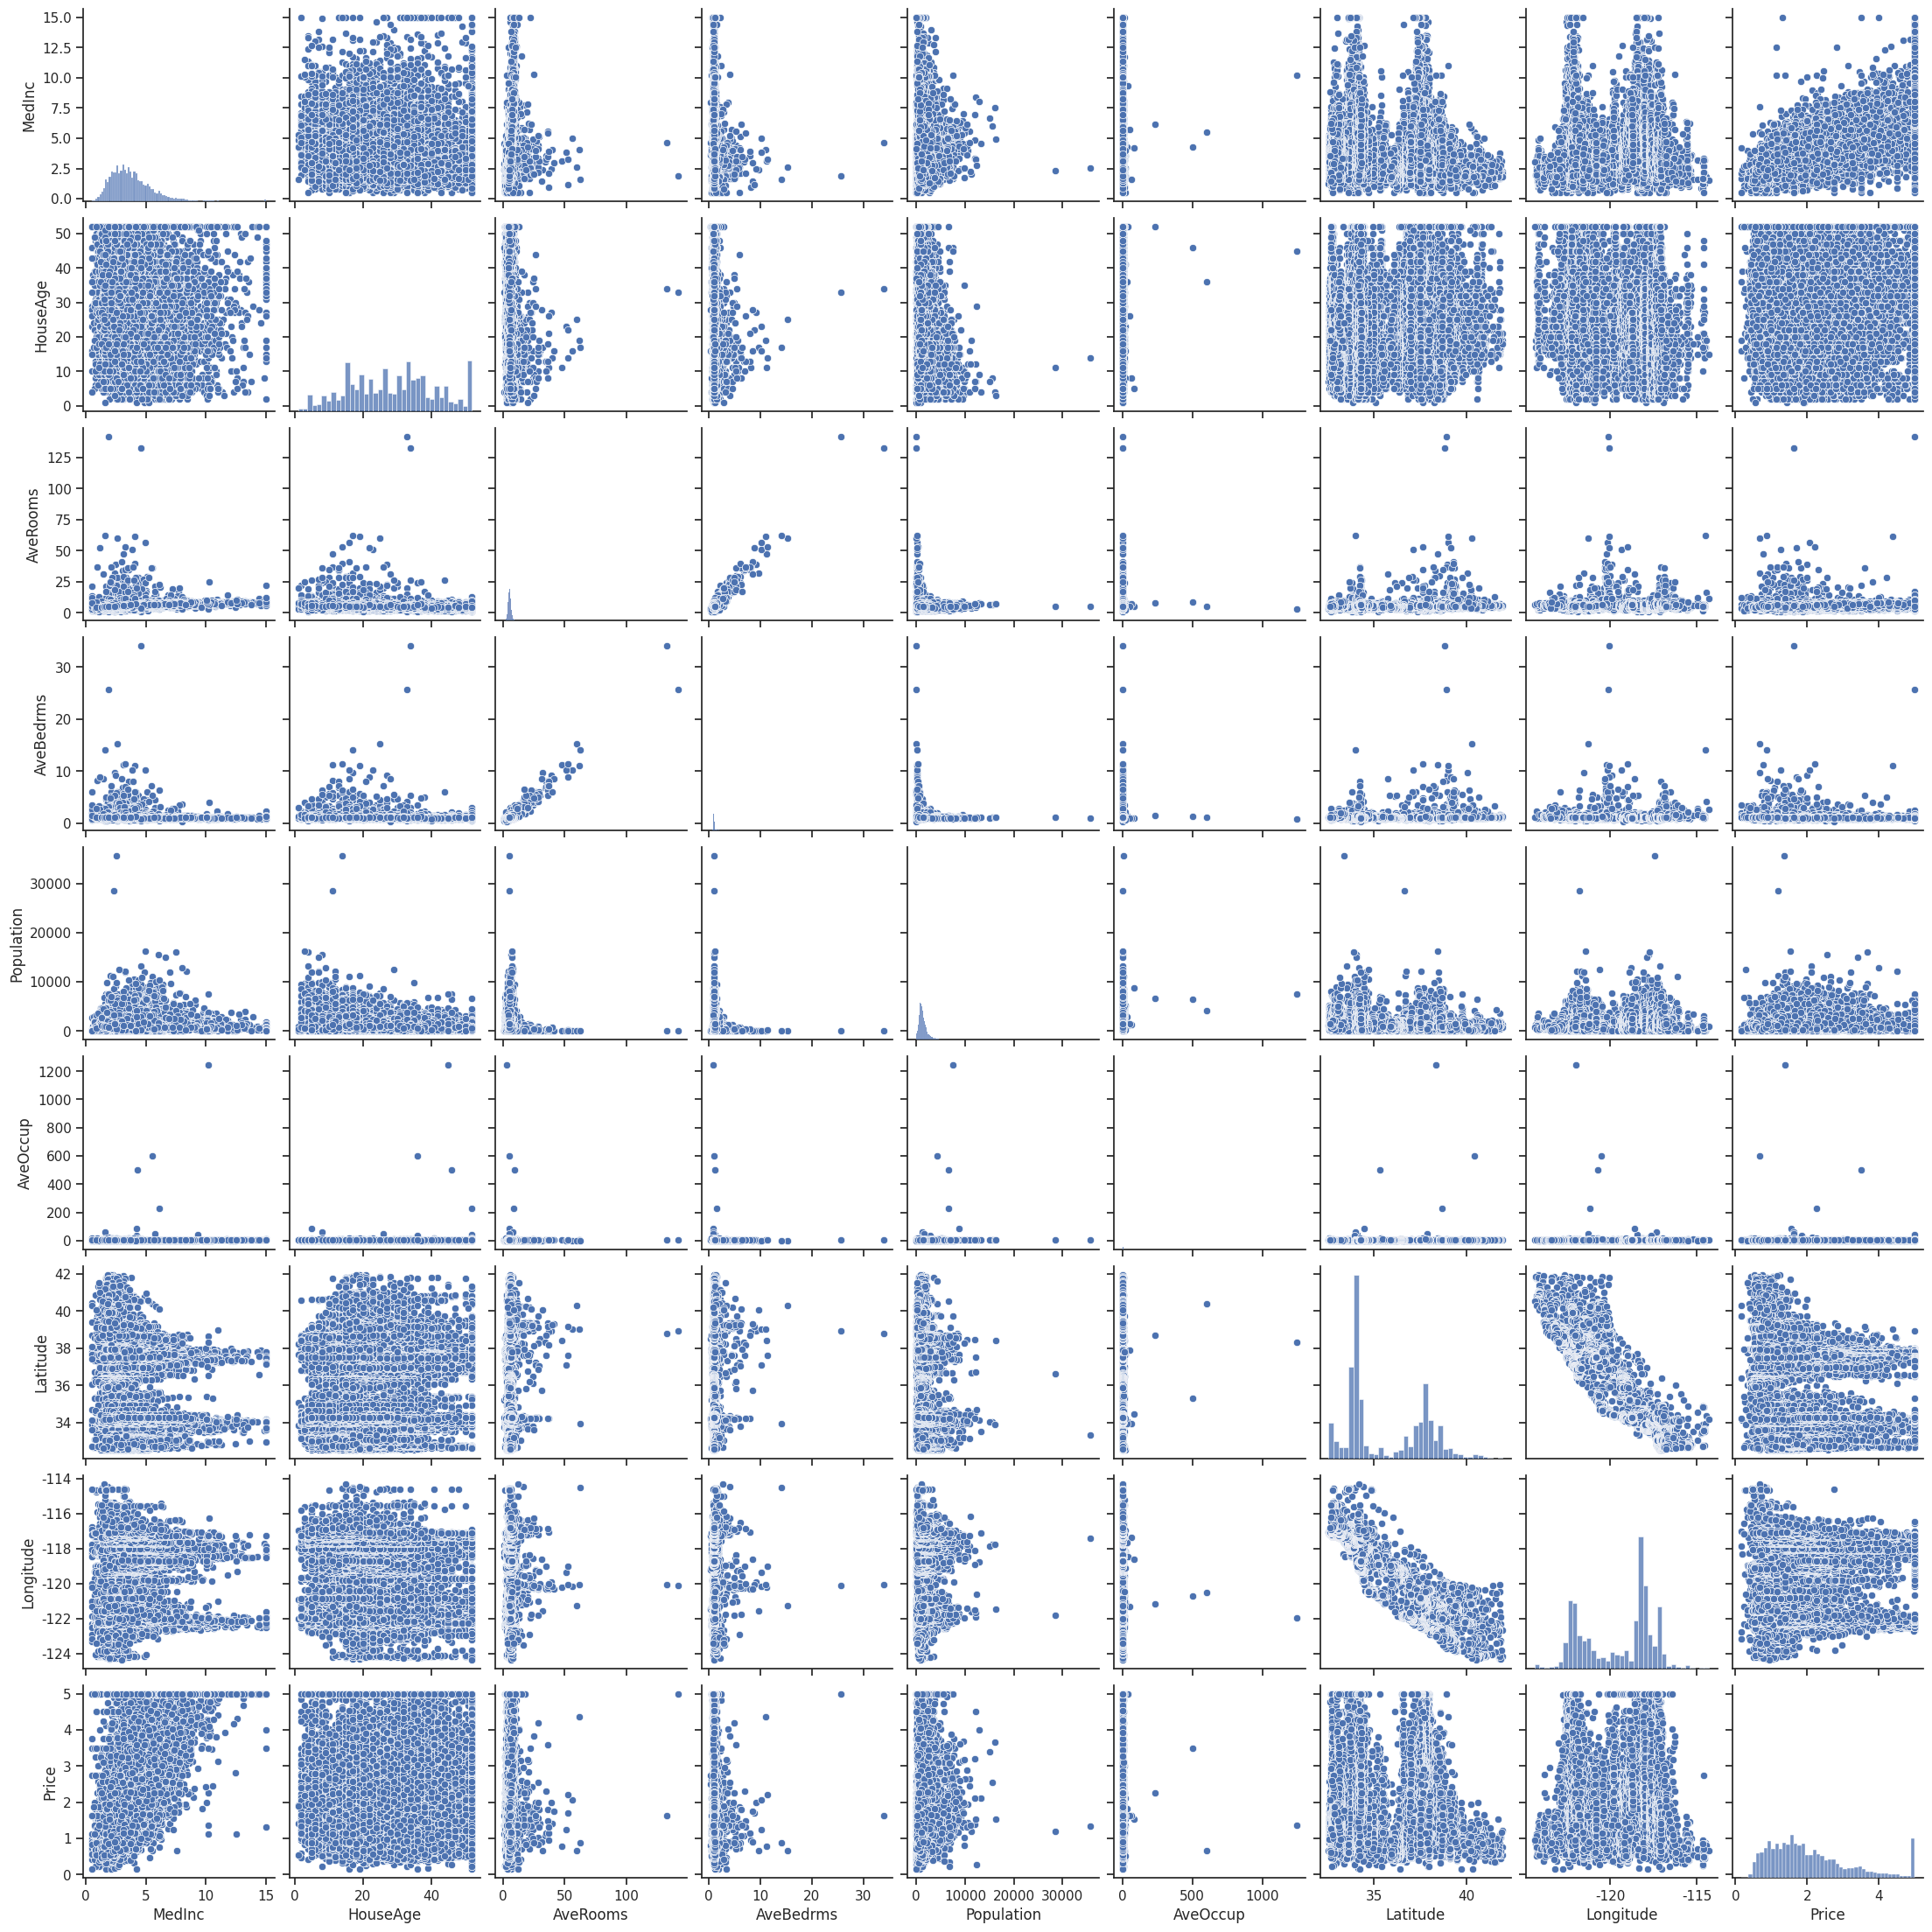

In [24]:
sns.set( style = 'ticks', color_codes = True )
g = sns.pairplot( df )

### 1.1 데이터 분리

In [25]:
# 훈련/테스트 데이터 분리
X_train_all, X_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target,
    test_size = 0.3, random_state = 42
)

# 훈련/검증 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_all, y_train_all,
    test_size = 0.3, random_state = 42
)

In [26]:
print( X_train.shape )
print( y_train.shape )
print( '-'*50 )
print( X_valid.shape )
print( y_valid.shape )
print( '-'*50 )
print( X_test.shape )
print( y_test.shape )

(10113, 8)
(10113,)
--------------------------------------------------
(4335, 8)
(4335,)
--------------------------------------------------
(6192, 8)
(6192,)


### 1.2 Scale 변환

In [27]:
from sklearn.preprocessing import StandardScaler # Scale 변환 - 표준화

In [33]:
print( X_train[ 0 ] )

[ 2.26790000e+00  3.90000000e+01  3.24096386e+00  1.01807229e+00
  1.24200000e+03  3.74096386e+00  3.40800000e+01 -1.17960000e+02]


In [34]:
scaler = StandardScaler()

# X_train을 기준으로 X_valid, X_test에 대한 표준화 수행
X_train = scaler.fit_transform( X_train ) # 표준화 기준 추출 / 표준화 수행
X_valid = scaler.transform( X_valid )
X_test = scaler.transform( X_test )

In [35]:
print( X_train[ 0 ] )

[-0.83801758  0.83246935 -0.99858361 -0.198599   -0.1569619   0.08787956
 -0.72678703  0.80577289]


## 2. 신경망 모델링

In [37]:
model = Sequential()
model.add( Dense( 32, activation = 'relu', input_shape = X_train.shape[ 1: ] ) )
model.add( Dense( 32, activation = 'relu' ) )
model.add( Dense( 1, activation = 'linear' ) )

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,377 (5.38 KB)

 Trainable params: 1,377 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

## 3. 모델 컴파일

In [39]:
sgd = optimizers.SGD()

model.compile( loss = 'mse',
               optimizer = sgd,
               metrics = [ 'mse', 'mae', 'accuracy' ] )

## 4. 훈련

In [40]:
history = model.fit( X_train, y_train, epochs = 20,
                     validation_data = ( X_valid, y_valid ) )

Epoch 1/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0032 - loss: 1.2602 - mae: 0.7634 - mse: 1.2602 - val_accuracy: 0.0030 - val_loss: 0.9311 - val_mae: 0.5474 - val_mse: 0.9311
Epoch 2/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0029 - loss: 0.6099 - mae: 0.5339 - mse: 0.6099 - val_accuracy: 0.0030 - val_loss: 0.4774 - val_mae: 0.4873 - val_mse: 0.4774
Epoch 3/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0032 - loss: 0.4365 - mae: 0.4733 - mse: 0.4365 - val_accuracy: 0.0030 - val_loss: 0.4943 - val_mae: 0.4814 - val_mse: 0.4943
Epoch 4/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0036 - loss: 0.4183 - mae: 0.4582 - mse: 0.4183 - val_accuracy: 0.0030 - val_loss: 0.4231 - val_mae: 0.4568 - val_mse: 0.4231
Epoch 5/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0034 - loss: 0.3903 - mae: 0.4423 - mse: 0.3903 - val_accuracy: 0.0030 - val_loss: 0.4093 - val_mae: 0.4485 - val_mse: 0.4093
Epoch 6/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 

### 4.1 훈련 과정 확인

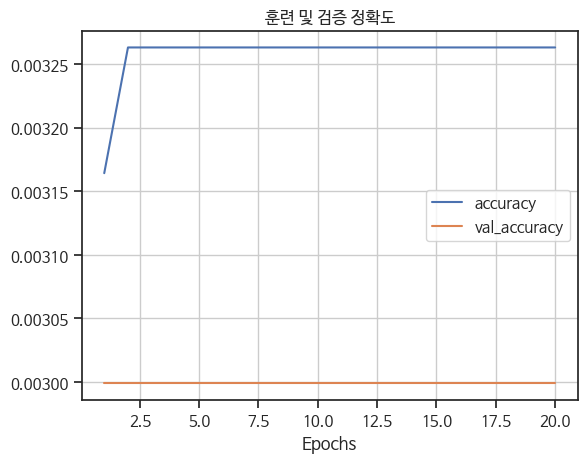

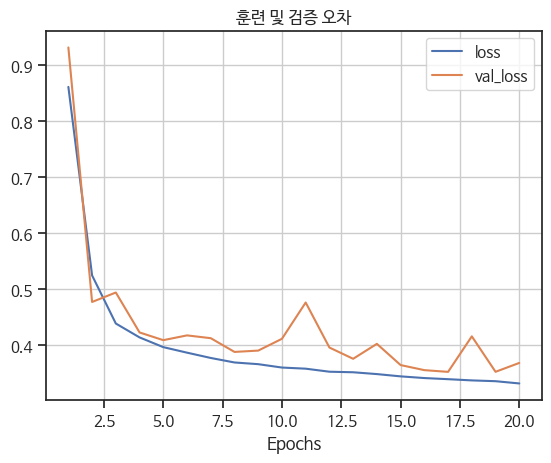

In [43]:
disp_training( history )

## 5. 모델 평가

In [44]:
loss, mse, mae, accuracy = model.evaluate( X_valid, y_valid )

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0027 - loss: 0.3644 - mae: 0.4285 - mse: 0.3644


In [45]:
print( f'MSE : {mse:.3f}' )
print( f'MAE : {mae:.3f}' )
print( f'accuracy : {accuracy:.3f}' )

MSE : 0.369
MAE : 0.432
accuracy : 0.003


### 5.1 평가 지표 확인

In [48]:
X_valid

array([[ 0.55689195, -0.92610239, -0.09852343, ...,  0.00593852,
        -0.90472631,  0.85070392],
       [ 2.1379545 , -0.44649192,  1.44611064, ..., -0.02081048,
        -1.32616144,  1.26007551],
       [-0.34484114, -1.6455181 , -0.17598646, ..., -0.01909934,
         1.41316691, -0.94154489],
       ...,
       [-0.17871022, -1.56558302,  1.52632422, ..., -0.04780571,
         1.39443646, -0.43232657],
       [ 0.12530987,  0.35285887,  0.32649761, ..., -0.02524259,
         1.22586241, -1.52065593],
       [-0.80482301,  1.55188506, -1.30663181, ...,  0.1366595 ,
        -0.75956532,  0.64601812]])

In [52]:
from tensorflow.keras.metrics import R2Score

In [54]:
metric = R2Score()

In [55]:
y_pred = model.predict( X_valid )

136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [56]:
metric.update_state( y_valid, y_pred )

In [57]:
result = metric.result()
result

<tf.Tensor: shape=(), dtype=float32, numpy=0.7302421>

## Wide & Deep Learning I

In [65]:
inputs = Input( shape = X_train.shape[ 1: ], name = 'Input' )
hidden1 = Dense( 32, activation = 'relu', name = 'Deep1' )( inputs )
hidden2 = Dense( 32, activation = 'relu', name = 'Deep2' )( hidden1 )
concat = Concatenate()( [ inputs, hidden2 ] ) # wide( inputs ), Deep( hidden2 ) 결합
outputs = Dense( 1, activation = 'linear' )( concat )

model = Model( inputs = [ inputs ], outputs = [ outputs ] )

In [66]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)        │ (None, 8)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Deep1 (Dense)             │ (None, 32)             │            288 │ Input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Deep2 (Dense)             │ (None, 32)             │          1,056 │ Deep1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 40)             │              0 │ Input[0][0],           │
│ (Concatenate)             │                        │                │ Deep2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 1)              │             41 │ concatenate_3[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,385 (5.41 KB)

 Trainable params: 1,385 (5.41 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
adam = optimizers.Adam( learning_rate = 0.005 )

model.compile( loss = 'mse',
               optimizer = adam,
               metrics = [ 'mse', 'mae', 'accuracy' ] )

In [69]:
history = model.fit( X_train, y_train, epochs = 100,
                     batch_size = 32,
                     validation_data = ( X_valid, y_valid ) )

Epoch 1/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0031 - loss: 1.3587 - mae: 0.7552 - mse: 1.3587 - val_accuracy: 0.0030 - val_loss: 0.5639 - val_mae: 0.4507 - val_mse: 0.5639
Epoch 2/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0029 - loss: 0.5817 - mae: 0.4565 - mse: 0.5817 - val_accuracy: 0.0030 - val_loss: 0.3871 - val_mae: 0.4490 - val_mse: 0.3871
Epoch 3/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0039 - loss: 0.3655 - mae: 0.4328 - mse: 0.3655 - val_accuracy: 0.0030 - val_loss: 0.5364 - val_mae: 0.4240 - val_mse: 0.5364
Epoch 4/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0028 - loss: 0.3677 - mae: 0.4267 - mse: 0.3677 - val_accuracy: 0.0030 - val_loss: 1.0511 - val_mae: 0.4827 - val_mse: 1.0511
Epoch 5/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0027 - loss: 0.4632 - mae: 0.4352 - mse: 0.4632 - val_accuracy: 0.0030 - val_loss: 0.5149 - val_mae: 0.4162 - val_mse: 0.5149
Epoch 6/100
317/317 ━━━━━━━━━━━━━━━

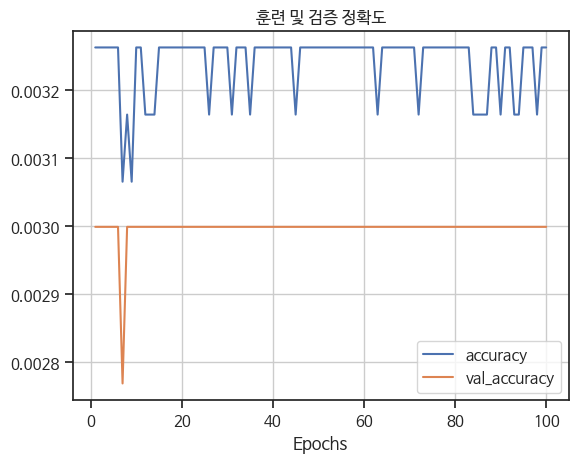

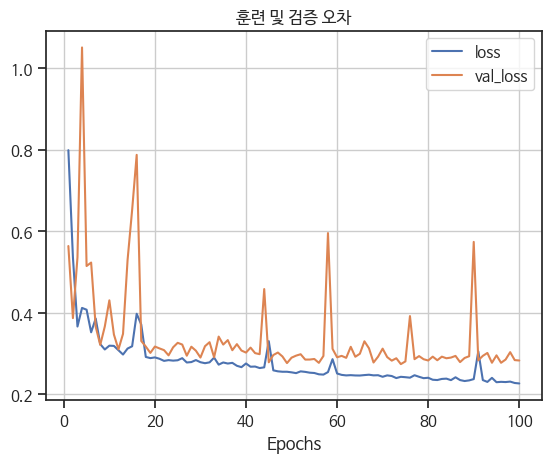

In [70]:
disp_training( history )

In [71]:
metric = R2Score()

In [72]:
y_pred = model.predict( X_valid )

136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [73]:
metric.update_state( y_valid, y_pred )

In [74]:
result = metric.result()
result

<tf.Tensor: shape=(), dtype=float32, numpy=0.7928346>

## Wide & Deep Learning II

In [75]:
inputs_A = Input( shape = [ 6 ], name = 'Input_A' )
inputs_B = Input( shape = [ 2 ], name = 'Input_B' )

hidden1 = Dense( 32, activation = 'relu', name = 'Deep1' )( inputs_A )
hidden2 = Dense( 32, activation = 'relu', name = 'Deep2' )( hidden1 )
concat = Concatenate()( [ inputs_B, hidden2 ] ) # wide( inputs_B ), Deep( hidden2 ) 결합

outputs = Dense( 1, activation = 'linear' )( concat )

model = Model( inputs = [ inputs_A, inputs_B ], outputs = [ outputs ] )

In [76]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input_A (InputLayer)      │ (None, 6)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Deep1 (Dense)             │ (None, 32)             │            224 │ Input_A[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Input_B (InputLayer)      │ (None, 2)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Deep2 (Dense)             │ (None, 32)             │          1,056 │ Deep1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 34)             │              0 │ Input_B[0][0],         │
│ (Concatenate)             │                        │                │ Deep2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │             35 │ concatenate_4[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
X_train_A, X_train_B = X_train[ :, :6 ], X_train[ :, 6: ]
X_valid_A, X_valid_B = X_valid[ :, :6 ], X_valid[ :, 6: ]

print( X_train_A.shape, X_train_B.shape )
print( X_valid_A.shape, X_valid_B.shape )

(10113, 6) (10113, 2)
(4335, 6) (4335, 2)


In [78]:
adam = optimizers.Adam( learning_rate = 0.005 )

model.compile( loss = 'mse',
               optimizer = adam,
               metrics = [ 'mse', 'mae', 'accuracy' ] )

In [79]:
history = model.fit( ( X_train_A, X_train_B ), y_train, epochs = 100,
                     batch_size = 32,
                     validation_data = ( ( X_valid_A, X_valid_B ), y_valid ) )

Epoch 1/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0031 - loss: 1.4463 - mae: 0.8263 - mse: 1.4463 - val_accuracy: 0.0030 - val_loss: 0.5597 - val_mae: 0.4929 - val_mse: 0.5597
Epoch 2/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0034 - loss: 0.4291 - mae: 0.4773 - mse: 0.4291 - val_accuracy: 0.0030 - val_loss: 0.4715 - val_mae: 0.4973 - val_mse: 0.4715
Epoch 3/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0035 - loss: 0.3960 - mae: 0.4493 - mse: 0.3960 - val_accuracy: 0.0030 - val_loss: 0.3818 - val_mae: 0.4362 - val_mse: 0.3818
Epoch 4/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0043 - loss: 0.3674 - mae: 0.4374 - mse: 0.3674 - val_accuracy: 0.0028 - val_loss: 0.4171 - val_mae: 0.4432 - val_mse: 0.4171
Epoch 5/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0027 - loss: 0.4038 - mae: 0.4540 - mse: 0.4038 - val_accuracy: 0.0030 - val_loss: 0.3846 - val_mae: 0.4476 - val_mse: 0.3846
Epoch 6/100
317/317 ━━━━━━━━━━━━━━━

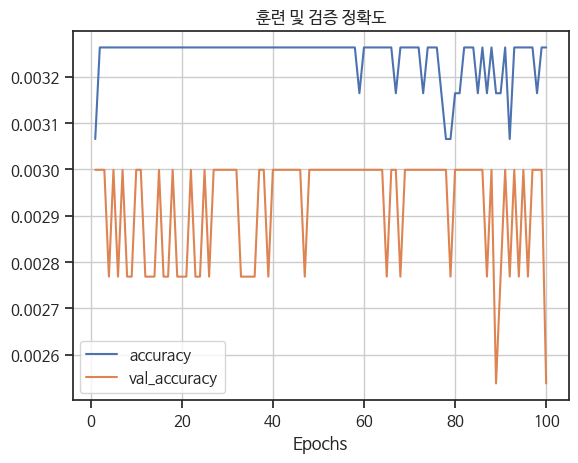

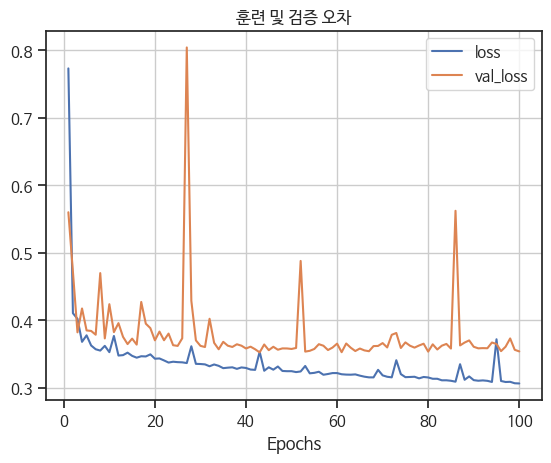

In [80]:
disp_training( history )

In [81]:
metric = R2Score()

In [83]:
y_pred = model.predict( ( X_valid_A, X_valid_B ) )

136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [84]:
metric.update_state( y_valid, y_pred )

In [85]:
result = metric.result()
result

<tf.Tensor: shape=(), dtype=float32, numpy=0.7413883>

## Wide & Deep Learning III

In [88]:
outputs = Dense( 1, activation = 'linear', name = 'Main_output' )( concat )
aux_outputs = Dense( 1, activation = 'linear', name = 'Aux_output' )( hidden2 )

model = Model( inputs = [ inputs_A, inputs_B ], outputs = [ outputs, aux_outputs ] )

In [89]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input_A (InputLayer)      │ (None, 6)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Deep1 (Dense)             │ (None, 32)             │            224 │ Input_A[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Input_B (InputLayer)      │ (None, 2)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Deep2 (Dense)             │ (None, 32)             │          1,056 │ Deep1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 34)             │              0 │ Input_B[0][0],         │
│ (Concatenate)             │                        │                │ Deep2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Main_output (Dense)       │ (None, 1)              │             35 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Aux_output (Dense)        │ (None, 1)              │             33 │ Deep2[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,348 (5.27 KB)

 Trainable params: 1,348 (5.27 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
adam = optimizers.Adam( learning_rate = 0.005 )

model.compile( loss = 'mse',
               optimizer = adam,
               metrics = [ ( 'accuracy' ), ( 'accuracy') ] )

In [97]:
history = model.fit( ( X_train_A, X_train_B ), ( y_train, y_train ), epochs = 100,
                     batch_size = 32,
                     validation_data = ( ( X_valid_A, X_valid_B ), ( y_valid, y_valid ) ) )

Epoch 1/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - Aux_output_accuracy: 0.0017 - Main_output_accuracy: 0.0022 - loss: 1.6751 - val_Aux_output_accuracy: 0.0028 - val_Main_output_accuracy: 0.0028 - val_loss: 0.8815
Epoch 2/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Aux_output_accuracy: 0.0034 - Main_output_accuracy: 0.0034 - loss: 0.7481 - val_Aux_output_accuracy: 0.0028 - val_Main_output_accuracy: 0.0028 - val_loss: 1.2042
Epoch 3/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Aux_output_accuracy: 0.0041 - Main_output_accuracy: 0.0041 - loss: 0.7757 - val_Aux_output_accuracy: 0.0030 - val_Main_output_accuracy: 0.0030 - val_loss: 0.8204
Epoch 4/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Aux_output_accuracy: 0.0035 - Main_output_accuracy: 0.0035 - loss: 0.7009 - val_Aux_output_accuracy: 0.0030 - val_Main_output_accuracy: 0.0025 - val_loss: 0.8124
Epoch 5/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Aux_output_accuracy: 0.0037 - Main_output_accuracy: 0.0037 - loss: 0.7337 - v

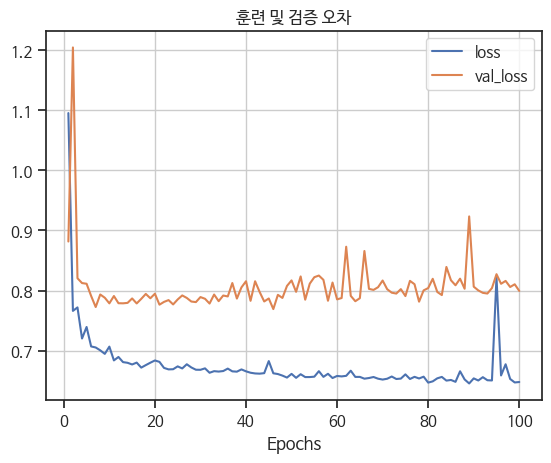

In [99]:
disp_loss( history )

In [104]:
result = model.evaluate( [ X_valid_A, X_valid_B ], [ y_valid, y_valid ] )

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Aux_output_accuracy: 0.0027 - Main_output_accuracy: 0.0025 - loss: 0.8044
